# Reinforcement Language

This technique has many applications in training agents and AI to interact with environments like games. Rather than feeding our machine learning model millions of examples we let our model come up with it's own examples by exploring the environment. 
CONCEPT: humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same

ENVIRONMENT - AGENT - STATE (time) - ACTION - REWARD
- The most important part of reinforcement learning is determining how to reward the agent. After all, the goal of the agent is to maximize its reward. This means we should reward the agent appropiatly such that it reaches the desired goal

# Q-Learning

Q-Learning is a technique thay involves learning a matrix of action-reward values. This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix [n,m] represents the agents expected reward given they are in state n and take action m. 
- The Q-Learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. The idea is that after a successful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state by looking at that stated row in the matrix and taking the manimium value column as the action

# Learning the Q-Table

Our Q-Table starts of with all 0 values. This is because the agent has yet to learn anything about the environment. 
- Our agent learns by exploring the environment and observing the ourcome/reward from each action it takes in a given state. 
- But how does it know what action to take in each state? There are two ways:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action
- Near the beginning of our agents learning it will mostly take random actions in order to explore the environment and enter many different states. As it starts to explore more of the environment it will start to gradually rely more on it's learned values (Q-Table) to take actions. 
- This means that as our agent explores more of the environment it will develop a better undestanding and start to take correct or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maxima
- After each new action, our agent will record the new state (if any) that it has entered and the reward that it received from taking the action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has acheived the goal or reached the end of the environment


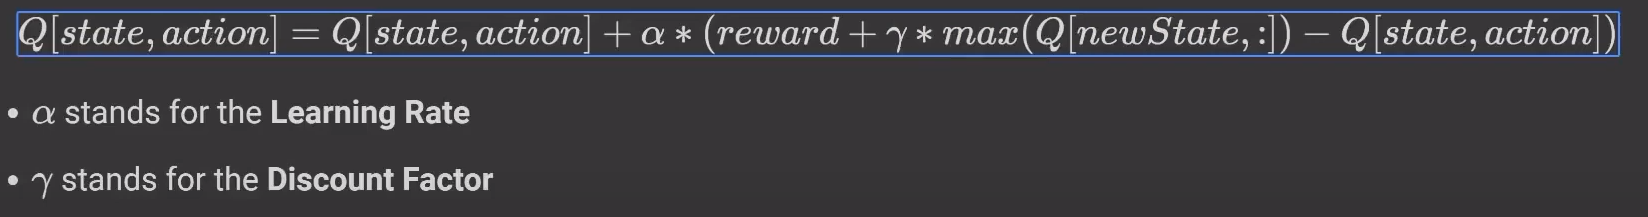

- alpha: numeric constant that defines how much change is permitted on each QTable update. A high learning rate means that each update will introduce a large change to the current state-action value. 
- gamma: it is used to balance how much focus is put on the current and future reward. A high discount factor means that future rewards will be considered more heavily.

# Q-Learning

We will use the Q-Learning algorithm to train an agent to nevigage a popular environment from the OpenAI Gym. The open AI Gym was developed so programmers could practice machine learning using unique environments

In [10]:
!pip install --upgrade gym
!pip install --upgrade pygame


In [2]:
pip install gym

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/721.7 kB 262.6 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/721.7 kB 581.0 kB/s eta 0:00:02
     ----------------------- -------------- 440.3/721.7 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for gym-notices>=0.0.4 from https://files.pythonhosted.org/packages/25/26/d786c6bec30fe6110fd3d22c9a273a2a0e56c0b73b93e25ea1af5a53243b/gym_notices-0.0.8-py3-none-any.wh

In [13]:
pip install pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/1b/e0/edce124be8f73249e6b862e13107adc1f7e3b275ed9468d018026b6fbf91/pygame-2.6.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 435.7 kB/s eta 0:00:25
    --------------------------------------- 0.2/10.8 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.8 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.8 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/10.8 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.8 MB 7.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/10.8 MB 8.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.8 MB 9.0 MB/s eta 0:00:01
   ------------- -------------------

In [11]:
import gym

In [12]:
env = gym.make('FrozenLake-v1') #we are going to use the frozenlake environment

Other commands that can be used to interact and get information about the environment

In [13]:
print(env.observation_space.n) #get the number of states
print(env.action_space.n) #get number of actions

16
4


In [14]:
env.reset() #reset environment to default state

(0, {'prob': 1})

In [15]:
action = env.action_space.sample() #get a random action
print(action)

0


In [17]:
new_state, reward, done, info, extra= env.step(action) #take action, notice it returns information about

In [18]:
env.render() #render the GUI for the environment (visualizacion que te permite ver como se ve el entorno en ese momento)

In [20]:
import gym

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env.reset()
env.render()  # Debería abrir una ventana con la visualización


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

# Building the Q-Table

We can build an empty Q-Table that we can use to store and update our values

In [21]:
import gym
import numpy as np
import time
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n 
ACTIONS = env.action_space.n 


In [22]:
Q = np.zeros ((STATES,ACTIONS)) #create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Constants

We need to define some constants that will be used to update our Q-Table and tell our agent when to stop training

In [27]:
EPISODES = 10000 #how many times to run the environment from the beggining
MAX_STEPS = 100 #max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 #learning rate
GAMMA = 0.96

RENDER = False

### Picking an action

We can pick an action using one of the two methods:
1. Randomly picking a valid action
2. Using the current table Q-Table to find the best action

In [25]:
epsilon = 0.9 #start wth a 90% chance of picking a random action

#code to pick action
if np.random.uniform(0,1) < epsilon: #we will check if a randomly selected value is less than epsilon
    action = env.action_space.sample() #take random action
else:
    action = np.argmax(Q[state, :]) #use Q Table to pick best action based on current values

### Updating Q Values

The code below implements the formula discussed above

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state,action])


### Puting all together

In [31]:
rewards = []
for episode in range(EPISODES):
    state, _ = env.reset()
    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()


        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        

        next_state, reward, done, _ , x= env.step(action) 

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state,action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break #reached goal

print(Q)
print(f'Average reward: {sum(rewards) / len(rewards)}: ')

        

[[0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.9639    0.183141  0.1551634]
 [0.        0.        0.        0.       ]]
Average reward: 0.0008008809690659726: 


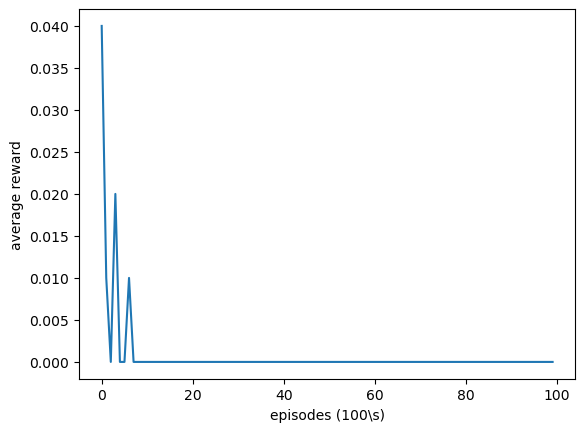

In [32]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average (values):
    return sum(values)/len(values)

avg_rewards = []
for i in range (0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\s)')
plt.show()